# Importing Data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [82]:
data_train = pd.read_csv("/kaggle/input/bigmart/Train.csv")
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [83]:
data_test = pd.read_csv("/kaggle/input/bigmart/Test.csv")
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# defining missing data****

In [84]:
missing_values_count = data_train.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
dtype: int64

In [85]:
# how many total missing values do we have?
total_cells = np.product(data_train.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.786812155344362


In [86]:
data_train.shape

(8523, 12)

In [87]:
data_test.shape

(5681, 11)

# EDA

In [88]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [89]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Visualization

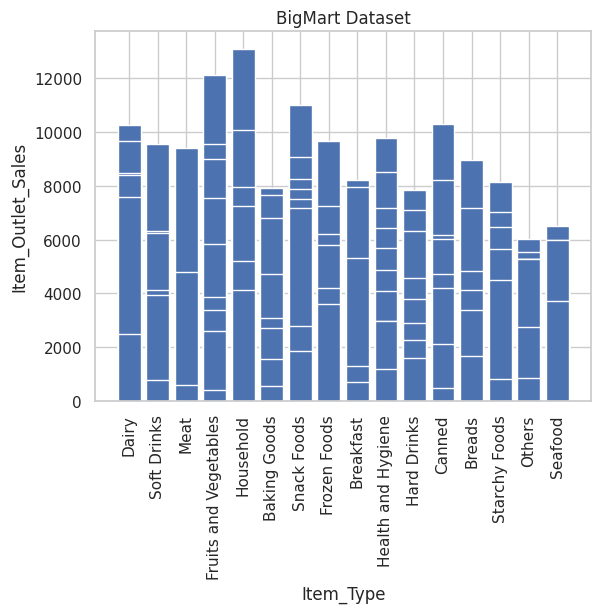

In [90]:
#Reading the tips.csv file
data = data_train
 
# initializing the data
x = data_train['Item_Type']
y = data_train['Item_Outlet_Sales']
 
# plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("BigMart Dataset")
 
# Adding label on the y-axis
plt.ylabel('Item_Outlet_Sales')
 
# Adding label on the x-axis
plt.xlabel('Item_Type')
plt.xticks(rotation = 90)
plt.show()

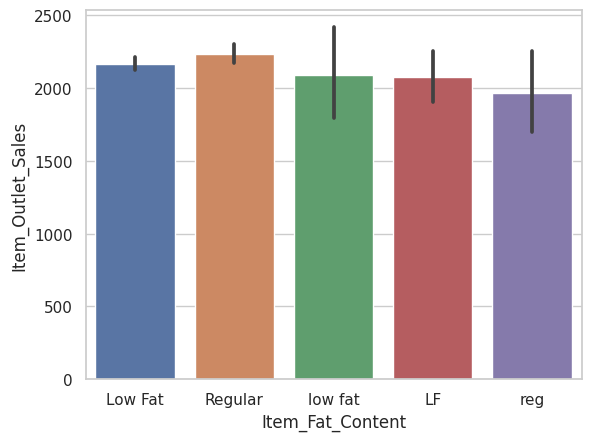

In [91]:

# reading the database
data = data_train
 
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data=data )
 
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

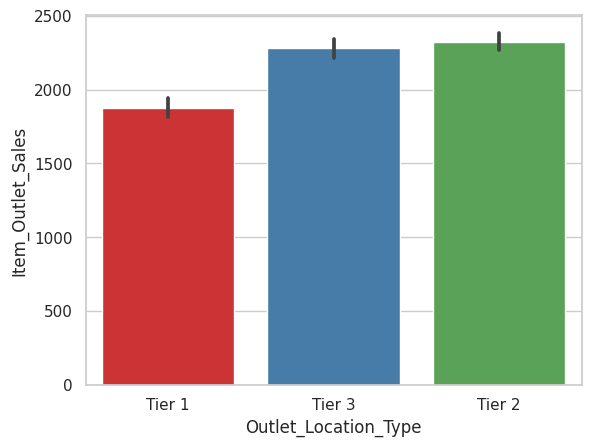

In [92]:
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = data, palette='Set1')

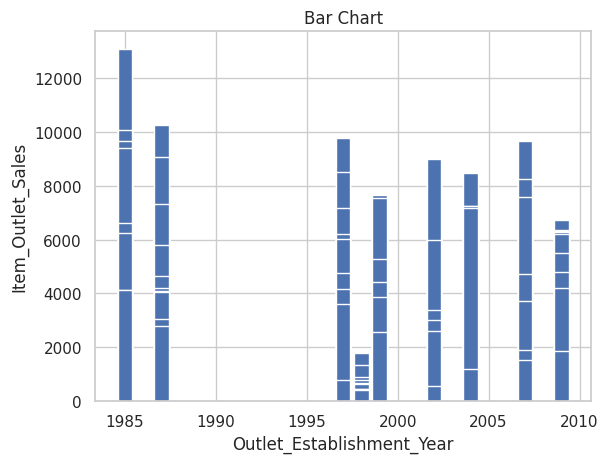

In [93]:
# reading the database
data = data_train
 
# Bar chart with day against tip
plt.bar(data['Outlet_Establishment_Year'], data['Item_Outlet_Sales'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
 
# Adding the legends
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

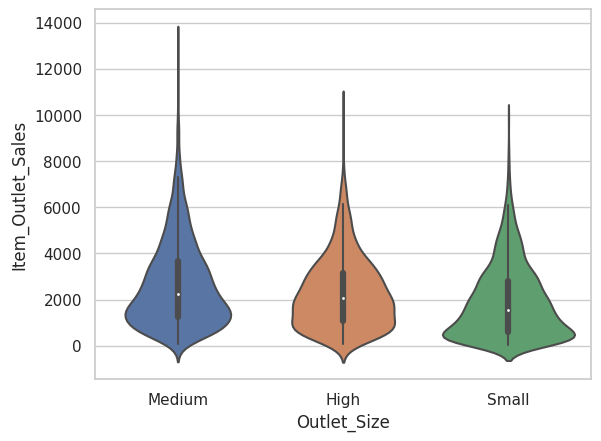

In [94]:
# read csv and plotting
sns.set(style = 'whitegrid') 
 
# read csv and plot
data = data_train
sns.violinplot(x ="Outlet_Size", y ="Item_Outlet_Sales",data = data)

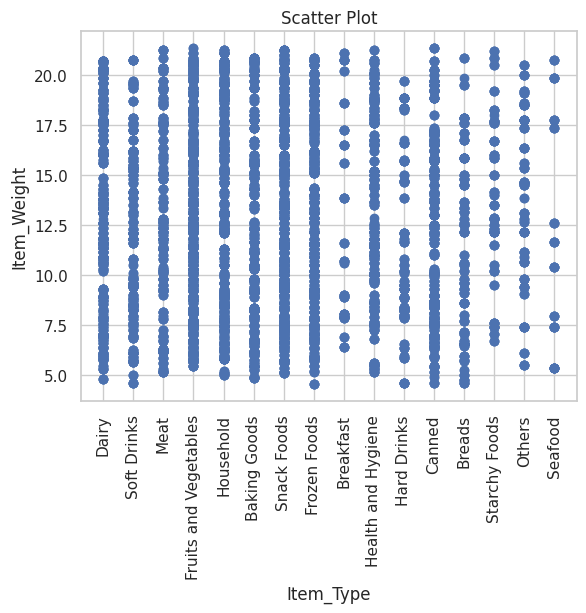

In [95]:
# reading the database
data = data_train
 
# Scatter plot with day against tip
plt.scatter(data['Item_Type'], data['Item_Weight'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Item_Type')
plt.ylabel('Item_Weight')
plt.xticks(rotation = 90)

plt.show()

# Feature Engineering

### Encoding

In [96]:
data=data_train

# *  label encoding

In [97]:

from sklearn.preprocessing import LabelEncoder
data['Item_Identifier'] =LabelEncoder().fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] =LabelEncoder().fit_transform(data['Item_Fat_Content'])
data['Item_Type'] =LabelEncoder().fit_transform(data['Item_Type'])
data['Outlet_Identifier'] =LabelEncoder().fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] =LabelEncoder().fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] =LabelEncoder().fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] =LabelEncoder().fit_transform(data['Outlet_Type'])


data



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# onehot encoding

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [98]:
#from sklearn.preprocessing import OneHotEncoder 
#data_train['Item_Identifier'] =OneHotEncoder(sparse=False).fit_transform(data_train[['Item_Identifier']])
#data_train

# PreProcessing Data****

##  Missing values

In [99]:
data.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [100]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan

filling = KNNImputer(n_neighbors=2, weights="uniform")
filled=filling.fit_transform(data)



In [101]:
newfilleddata = pd.DataFrame(filled, columns = data.columns)
newfilleddata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0,1845.5976


In [102]:
newfilleddata.isna().mean()*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

# Modeling****

# ****Machine Learning model

### Splitting dataset

In [103]:
X = newfilleddata.iloc[:,:-1]
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0


In [104]:
y = newfilleddata.iloc[:, -1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [106]:
print('X_train : ')
print(X_train.head())
print(X_train.shape)
 
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
 
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
 
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train : 
      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
7276            681.0        7.210               2.0         0.144925   
1422           1357.0       10.600               3.0         0.035164   
4561            787.0       19.700               1.0         0.041974   
6183            133.0        9.600               1.0         0.000000   
1644            307.0        6.035               1.0         0.236434   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
7276       13.0  100.8332                7.0                     2002.0   
1422        8.0   84.4224                1.0                     1987.0   
4561        5.0  108.6912                2.0                     2007.0   
6183       14.0  166.5158                9.0                     1999.0   
1644       13.0  155.5998                0.0                     1998.0   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
7276          3.0                   1.0     

## Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("mean squared error :" ,mean_squared_error(y_test,y_pred))


mean squared error : 1513070.9573532853


## random forest 

In [108]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("mean squared error :" ,mean_squared_error(y_test,y_pred))


mean squared error : 1513070.9573532853


## XGBoost 

In [109]:
from sklearn.ensemble import GradientBoostingRegressor


model4 = GradientBoostingRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("mean squared error :" ,mean_squared_error(y_test,y_pred))

mean squared error : 1513070.9573532853
